In [216]:
import h5py
import csv
import numpy
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared

In [175]:
CHUNKS_TRAIN_FILE = "train_chunks.h5"
CHUNKS_PREDICTIONS_FILE = "chunks_predictions.csv"
# Start predicting this many ticks in the future
PREDICTION_START = 28
# Predict this many tics
PREDICTION_SIZE = 8
# Channel to predict
TARGET_CHANNEL = 15 
NUMBER_OF_CHANNELS = 21

In [176]:
%matplotlib inline
import matplotlib.pyplot as plt

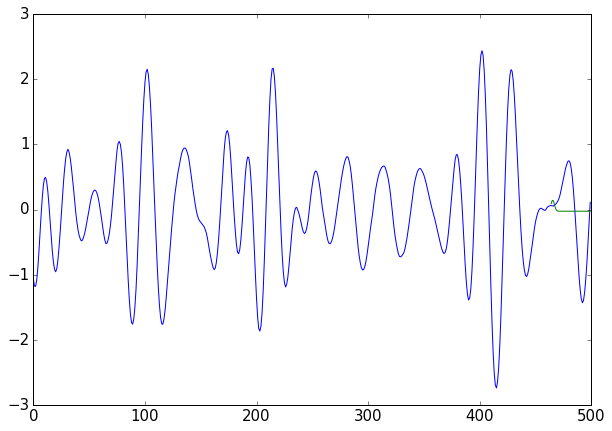

In [228]:
scores = []
evaluation_model = GaussianProcessRegressor(kernel=ExpSineSquared()+RBF())
with h5py.File(CHUNKS_TRAIN_FILE) as data_file:
    with open(CHUNKS_PREDICTIONS_FILE, 'w') as predictions_io:
        predictions_writer = csv.writer(predictions_io)
        predictions_writer.writerow(["chunk_id", "tick_index", "tick_value"])
        for chunk_id, chunk in data_file.items():
            evaluation_model.fit(numpy.arange(chunk.shape[0]-PREDICTION_START-PREDICTION_SIZE)[:, numpy.newaxis],
                                 chunk[:-PREDICTION_START-PREDICTION_SIZE, TARGET_CHANNEL])
            plt.plot(numpy.arange(chunk.shape[0]), chunk[:,TARGET_CHANNEL])
            prediction = evaluation_model.predict(
                numpy.arange(chunk.shape[0]-PREDICTION_START-PREDICTION_SIZE, chunk.shape[0])[:, numpy.newaxis])
            plt.plot(numpy.arange(chunk.shape[0]-PREDICTION_START-PREDICTION_SIZE, chunk.shape[0]), prediction)
            break

In [171]:
demonstration_tail = 3

In [172]:
evaluation_model.fit(features[:-demonstration_tail], values[:-demonstration_tail])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

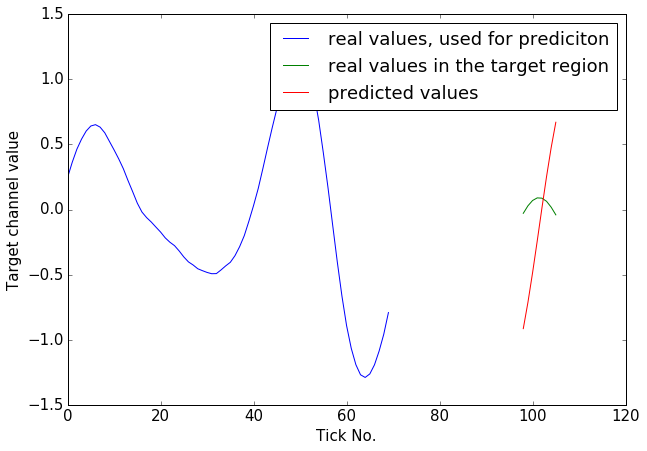

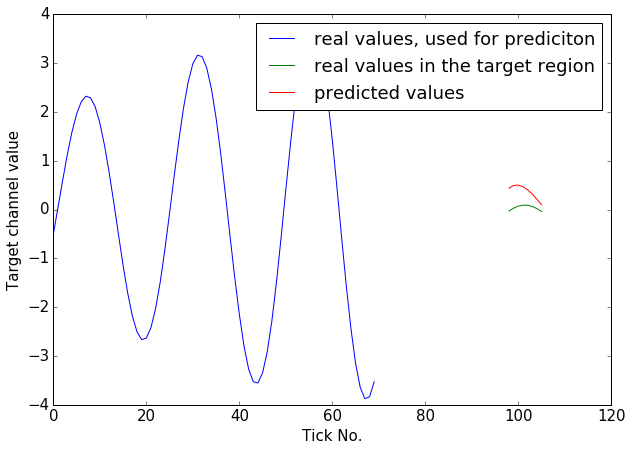

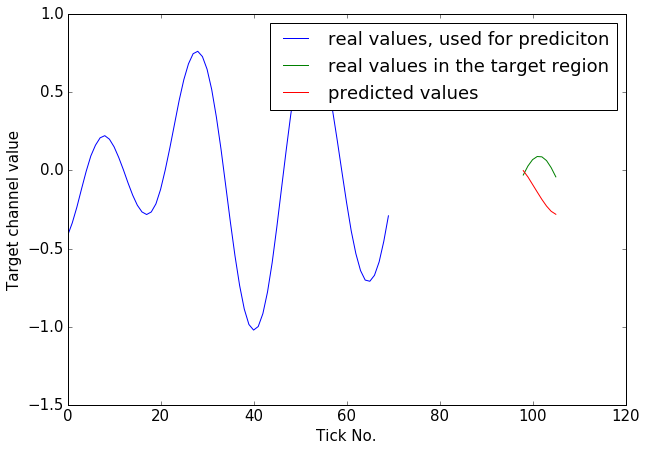

In [173]:
for eeg_before, eeg_after in zip(features[-demonstration_tail:], values[-demonstration_tail:]):
    fig, ax = plt.subplots()
    eeg_before_in_shape = eeg_before.reshape((-1, NUMBER_OF_CHANNELS))[:, TARGET_CHANNEL]
    ax.plot(numpy.arange(eeg_before_in_shape.shape[0]), eeg_before_in_shape,
            label="real values, used for prediciton")
    ax.plot(numpy.arange(eeg_before_in_shape.shape[0]+PREDICTION_START,
                         eeg_before_in_shape.shape[0]+PREDICTION_START+PREDICTION_SIZE), value,
           label="real values in the target region")
    prediction = evaluation_model.predict(eeg_before.reshape(1, -1))[0]
    ax.plot(numpy.arange(eeg_before_in_shape.shape[0]+PREDICTION_START,
                         eeg_before_in_shape.shape[0]+PREDICTION_START+PREDICTION_SIZE), prediction,
           label="predicted values")
    ax.legend()
    ax.set_xlabel("Tick No.")
    ax.set_ylabel("Target channel value")